In [142]:
# Import necessary libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter 

In [143]:
# Load the dataset
df = pd.read_csv('Walmart_Sales.csv')
print(df.head())
df.shape

   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


(6435, 8)

In [144]:
# Data Cleaning
# 1. Check for data type
print(df.dtypes)
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y') # Convert Date column from object to datetime data type

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object


In [145]:
# 2. Check for duplicate rows and remove them if present
print(df.duplicated().sum())
df.drop_duplicates()

0


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


This datatset does not having any duplicate rows.

In [146]:
# 3. Check for missing values
print(df.isnull().sum())

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


This dataset does not contain any missing values.

Data Analysis

This analysis explores weekly sales data for Walmart to uncover trends and correlations among key variables that could impact sales. The dataset contains weekly sales figures, along with other economic and environmental factors such as Temperature, Fuel Price, CPI (Consumer Price Index), and Unemployment. By examining these relationships, we aim to understand how external factors might influence weekly sales performance.

The primary objectives of this analysis are :

1. Correlation Analysis: To evaluate the strength and direction of relationships between weekly sales and other variables like Temperature, Fuel Price, CPI, and Unemployment.

2. Holiday Impact Assessment: To assess the effect of holiday periods on weekly sales and compare sales performance during holiday and non-holiday weeks.

3. Sales Trend Analysis: To identify overall patterns in weekly average sales over time.

To achieve these objectives, we will employ various data visualization techniques in python, including line plots for trend analysis, heatmaps for correlation analysis, and scatter plots to examine specific relationships also included barplot and histogram. The insights gathered will help reveal factors that could influence Walmart's sales, providing a basis for strategic business decisions.


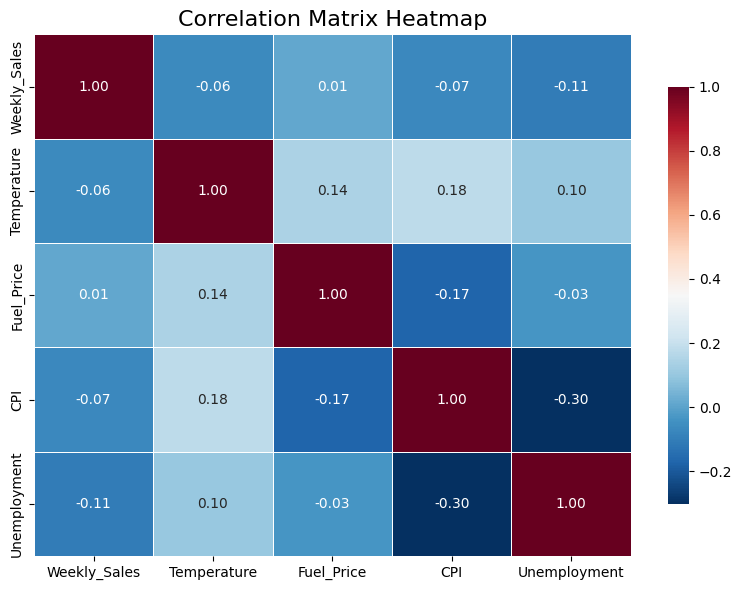

In [147]:
# Select only the numeric columns needed for correlation
data_numeric = df[["Weekly_Sales", "Temperature", "Fuel_Price", "CPI", "Unemployment"]]

# Calculate the correlation matrix
cor_matrix = data_numeric.corr()

# Plot the full correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cor_matrix, 
            annot=True,         # Display correlation values
            fmt=".2f",          # Format the correlation values
            cmap="RdBu_r",      # Colors for the heatmap (red to blue)
            linewidths=0.5,     # Add lines between cells
            cbar_kws={"shrink": 0.8})  # Adjust the size of the color bar

# Add a title to the heatmap
plt.title("Correlation Matrix Heatmap", fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

Conclusion
1. Weekly Sales

- There is a weak negative correlation between Weekly_Sales and Unemployment (-0.11), CPI (-0.07) and Temperature (-0.06). These negative values suggest that as unemployment, CPI or temperature increases, weekly sales may slightly decrease, though the correlation is very weak.
- Weekly Sales show a very weak, almost negligible, positive correlation with Fuel Price(0.01)

2. Temperature

- Temperature has a weak positive correlation with CPI (0.18) and Fuel_Price (0.14), indicating that temperature might slightly rise with the consumer price index and fuel price.

3. Fuel Price

- Fuel_Price has a weak negative correlation with CPI (-0.17), meaning that as fuel prices increase, there may be a slight decrease in the CPI, though this relationship is weak.

4. CPI

- Moderate negative correlation with Unemployment (-0.3), which shows a slight tendency for unemployment to rise as CPI decreases, though this is still a weak relationship.

5. Unemployment

- Moderate negative correlation with CPI (-0.3), indicating that when unemployment is high, CPI tends to be lower, which could reflect general economic trends.

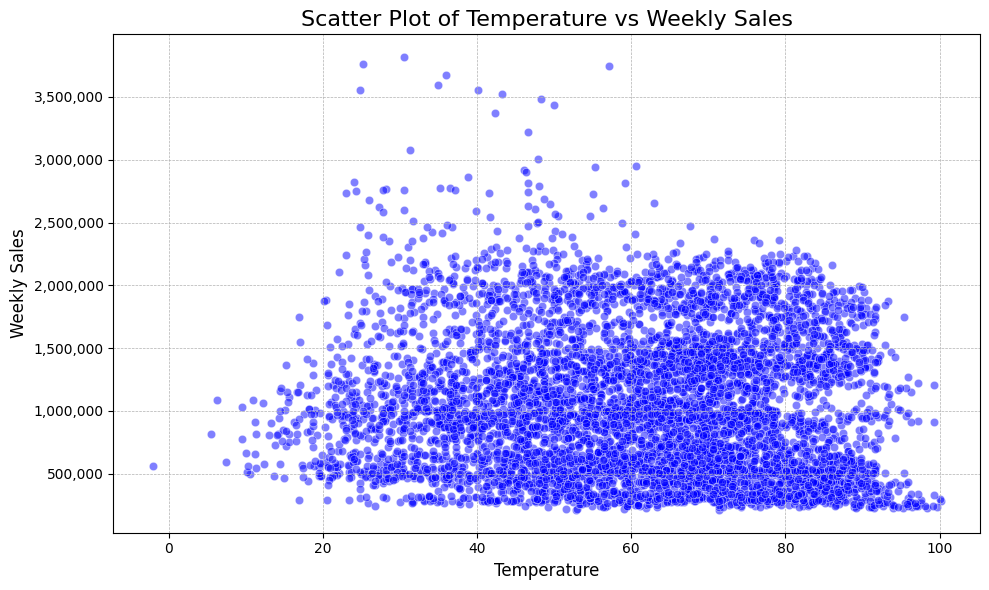

In [148]:
# Create a scatter plot
plt.figure(figsize=(10, 6))  # Set figure size
sns.scatterplot(data=df, 
                x="Temperature", 
                y="Weekly_Sales", 
                color="blue", 
                alpha=0.5)  # Scatter points with transparency

# Add title and labels
plt.title("Scatter Plot of Temperature vs Weekly Sales", fontsize=16)
plt.xlabel("Temperature", fontsize=12)
plt.ylabel("Weekly Sales", fontsize=12)

# Format the y-axis with commas for full values
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

# Apply a minimal theme
plt.grid(visible=True, which='major', linestyle='--', linewidth=0.5)    # Display grid on the plot
plt.tight_layout()

# Show the plot
plt.show()

Conclusion

1. There appears to be weak correlation between temperature and weekly sales, as the data points are widely scattered without a clear upward or downward trend.

2. Sales remain relatively consistent across different temperature ranges, which shows temperature has minimal impact on weekly sales in this dataset.

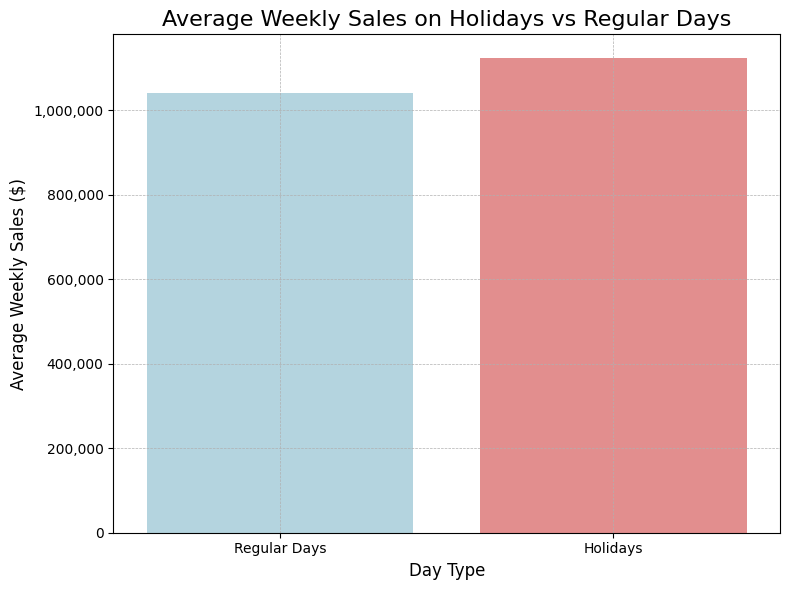

In [149]:
# Calculate average sales for holidays and regular days
average_sales = df.groupby("Holiday_Flag")["Weekly_Sales"].mean().reset_index()

# Convert Holiday_Flag to categorical labels
average_sales["Holiday_Flag"] = average_sales["Holiday_Flag"].replace({0: "Regular Days", 1: "Holidays"})

# Plotting the average sales
plt.figure(figsize=(8, 6))
sns.barplot(data=average_sales, 
            x="Holiday_Flag", 
            y="Weekly_Sales", 
            hue="Holiday_Flag", 
            palette=["lightblue", "lightcoral"],
            legend=False)

# Add labels and title
plt.title("Average Weekly Sales on Holidays vs Regular Days", fontsize=16)
plt.xlabel("Day Type", fontsize=12)
plt.ylabel("Average Weekly Sales ($)", fontsize=12)

# Format y-axis labels with commas
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

# Apply minimal theme
plt.grid(visible=True, which="major", linestyle="--", linewidth=0.5)
plt.tight_layout()

# Show the plot
plt.show()

Conclusion

1. Higher Average Sales on Holidays

- The bar representing holidays shows a significantly higher average weekly sales value compared to regular days. This suggests that holidays have a positive impact on weekly sales, likely due to increased shopping and spending during holiday periods.

2. Regular Days Have Lower Sales Consistency

- The average weekly sales on regular days are lower, which is expected as these periods lack the holiday-specific incentives that drive consumers to make larger purchases.

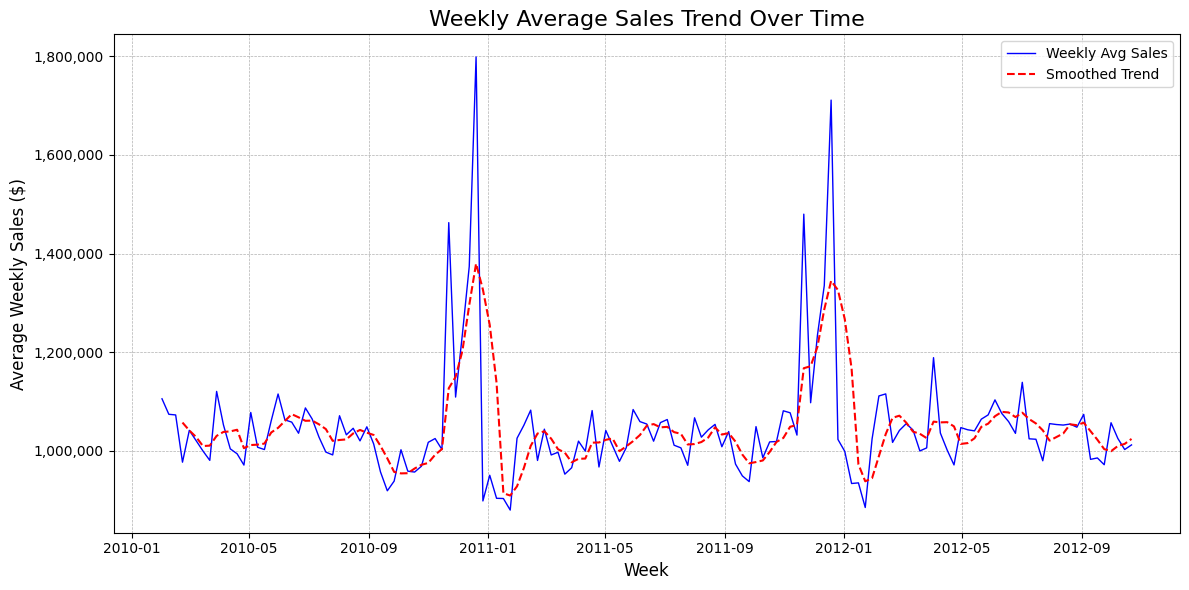

In [150]:
# Add a rolling mean column for smoothing
weekly_avg_sales_filtered['Smoothed_Sales'] = weekly_avg_sales_filtered['Weekly_Sales'].rolling(window=4).mean()

# Plot the weekly average sales trend
plt.figure(figsize=(12, 6))

# Line plot of weekly average sales
sns.lineplot(data=weekly_avg_sales_filtered, x='Week', y='Weekly_Sales', color='blue', linewidth=1, label='Weekly Avg Sales')

# Smoothed trend line using rolling mean
sns.lineplot(data=weekly_avg_sales_filtered, x='Week', y='Smoothed_Sales', color='red', linestyle='dashed', label='Smoothed Trend')

# Add labels and title
plt.title("Weekly Average Sales Trend Over Time", fontsize=16)
plt.xlabel("Week", fontsize=12)
plt.ylabel("Average Weekly Sales ($)", fontsize=12)

# Format the y-axis with commas
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

# Customize the grid and theme
plt.grid(visible=True, which="major", linestyle="--", linewidth=0.5)
plt.tight_layout()

# Show the plot
plt.show()


Conclusion

1. Significant Sales Peaks

- There are two notable spikes in weekly average sales, one in late 2010 and another in late 2011.

2. General Stability with Minor Fluctuations

- Apart from the occasional peaks and dips, weekly average sales remain relatively stable around the mean which is the red dashed line.


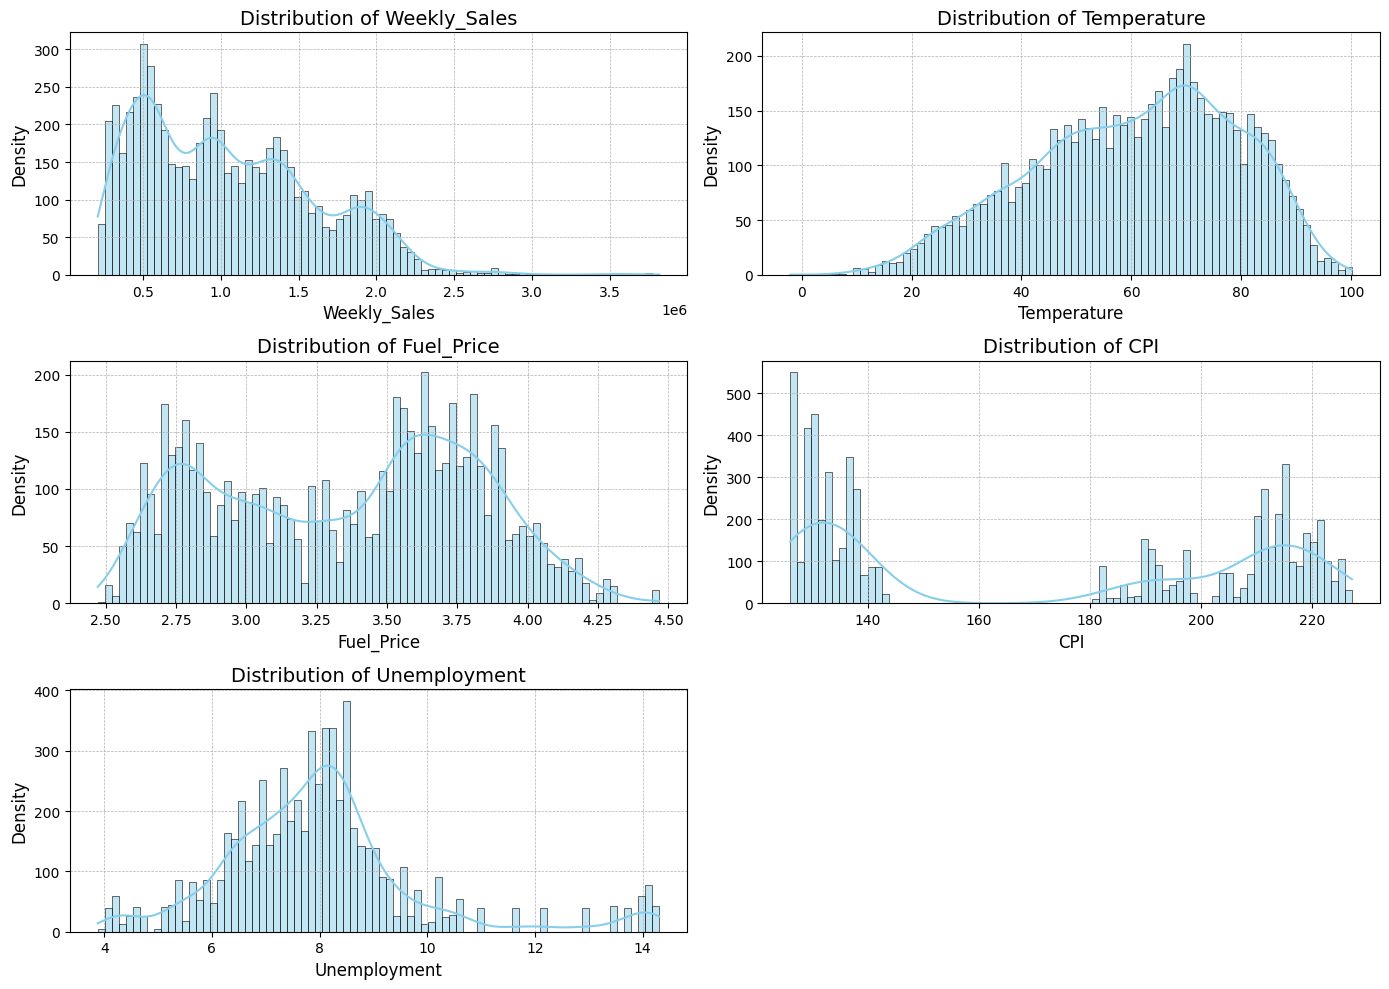

In [151]:
# Define the columns to plot
columns = ["Weekly_Sales", "Temperature", "Fuel_Price", "CPI", "Unemployment"]

# Calculate the number of bins using the square root rule
num_bins = round(np.sqrt(len(df)))

# Create subplots for each column
plt.figure(figsize=(14, 10))  # Adjust the size of the figure
for i, col in enumerate(columns):
    plt.subplot(3, 2, i + 1)  # Create a 3x2 grid of subplots
    sns.histplot(data=df, x=col, kde=True, bins=num_bins, color="skyblue", edgecolor="black", alpha=0.5)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.grid(visible=True, which="major", linestyle="--", linewidth=0.5)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

Conclusion

1. Weekly Sales

- Right-skewed, indicating that most weeks have lower sales with occasional high sales outliers.

2. Temperature

- Normal distribution, with temperatures clustering around a mean and fewer values at extreme lows and highs.

3. Fuel Price

- Likely multimodal, with peaks at certain price ranges, suggesting clusters of common fuel prices.

4. CPI

 - Close to a bimodal distribution, reflecting different economic conditions over time.

5. Unemployment

- Approximately normal distribution, with values clustering around a mean and fewer observations at extremely low or high unemployment rates.